# 任务三：选择排序

**实现基本功能**：

　（1）简单选择排序（Simple Selection Sort）（难度：★★）
 
　（2）堆排序（Heap Sort）（难度：★★★★）

## 1. 简单选择排序

　　该算法的实现思想为：对于具有 n 个记录的无序表遍历 n-1 次，第 i 次从无序表中第 i 个记录开始，找出后序关键字中最小的记录，然后放置在第 i 的位置上。
	
　　算法步骤：
	
![Image Name](https://cdn.kesci.com/upload/image/qxpqjw9yvc.png)

### 1.1 简单选择排序函数

In [1]:
## 对顺序表做简单选择排序
def SelectSort(sqlist):
    for i in range(len(sqlist)):
        k = i
        for j in range(i+1, len(sqlist)):
            if sqlist[j] < sqlist[k]:
                k = j # k指向此趟排序中关键字最小的记录
        if k != i:
            temp = sqlist[i]
            sqlist[i] = sqlist[k]
            sqlist[k] = temp
    return sqlist

### 1.2 测试

In [2]:
sqlist = [49, 38, 65, 97, 49, 13, 27, 76]
print(" 原始序列：", sqlist)
print("排序后序列：", SelectSort(sqlist))

 原始序列： [49, 38, 65, 97, 49, 13, 27, 76]
排序后序列： [13, 27, 38, 49, 49, 65, 76, 97]


## 2. 堆排序

　　对于堆的定义也可以使用完全二叉树来解释，因为在完全二叉树中第 i 个结点的左孩子恰好是第 2i 个结点，右孩子恰好是 2i+1 个结点。如果该序列可以被称为堆，则使用该序列构建的完全二叉树中，每个根结点的值都必须不小于（或者不大于）左右孩子结点的值。
	
　　算法步骤：

![Image Name](https://cdn.kesci.com/upload/image/qxpqny6x8a.png)

### 2.1 筛选法调整堆

![Image Name](https://cdn.kesci.com/upload/image/qxpucb959z.png)
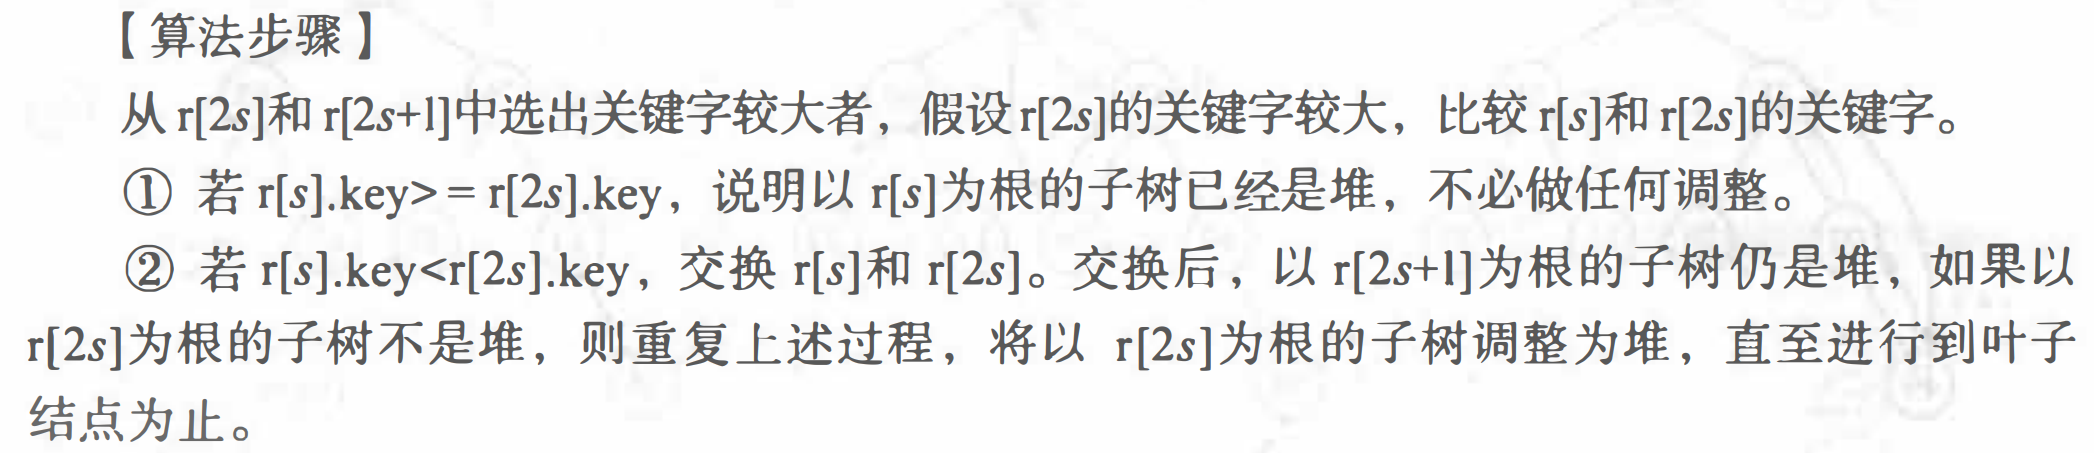

In [31]:
## 假设sqlist[s+1..m]已经是堆，将sqlist[s..m]调整为以sqlist[s]为根的大根堆
def HeapAdjust(sqlist, s, m):
    rc = sqlist[s]
    j = 2*s
    while j <= m:
        if j < m and sqlist[j] < sqlist[j+1]:
            j = j + 1
        if rc >= sqlist[j]:
            break
        sqlist[s] = sqlist[j]
        s = j
        j = j * 2
    sqlist[s] = rc

### 2.2 建初堆

![Image Name](https://cdn.kesci.com/upload/image/qxpucy2gjq.png)
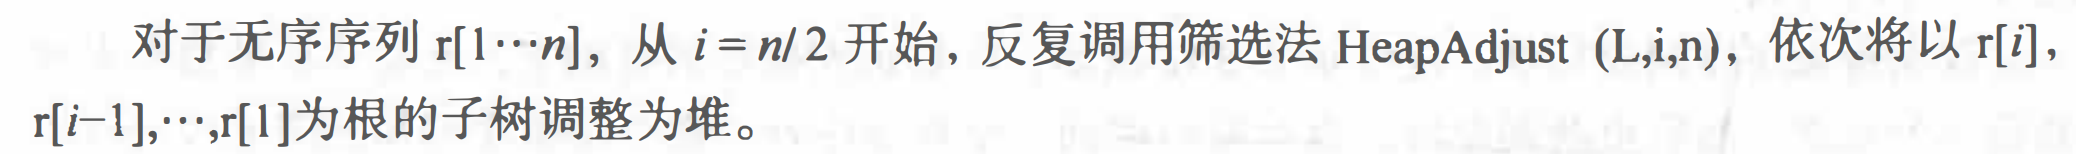

In [32]:
## 把无序序列sqlist[0..n-1]建成大根堆
def CreatHeap(sqlist):
    n = len(sqlist)
    for i in range(int(n/2)-1, -1, -1): # 反复调用HeapAdjust
        HeapAdjust(sqlist, i, n-1)

### 2.3 堆排序算法实现

　　根据前面堆排序算法步骤的描述，可知堆排序就是将无序序列建成初堆以后，反复进行交换和堆调整。在建初堆和调整堆算法实现的基础上，下面给出堆排序算法的实现。

In [35]:
## 对顺序表sqlist进行堆排序
def HeapSort(sqlist):
    CreatHeap(sqlist) # 把无序序列sqlist[0..n-1]建成大根堆
    for i in range(len(sqlist)-1, 0, -1):
        # 将堆顶元素和当前未经排序子序列sqlist[0..i-1]中最后一个记录互换
        x = sqlist[0]
        sqlist[0] = sqlist[i]
        sqlist[i] = x
        HeapAdjust(sqlist, 0, i-2) # 将sqlist[0..i-2]重新调整为大根堆
    return sqlist

### 2.4 测试

In [36]:
sqlist = [49, 38, 65, 97, 76, 13, 27, 49]
print(" 原始序列：", sqlist)
print("排序后序列：", HeapSort(sqlist))

 原始序列： [49, 38, 65, 97, 76, 13, 27, 49]
排序后序列： [13, 27, 38, 49, 49, 65, 76, 97]
